# K-means
K-means is an unsupervised learning algorithm. Just for comparison, we'll still show how it assigns **clusters** to unlabeled data and compare it with the actual classes of the iris dataset!

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
iris = sns.load_dataset('iris')

In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Let's scatter plot using the both features with highest standard deviation!

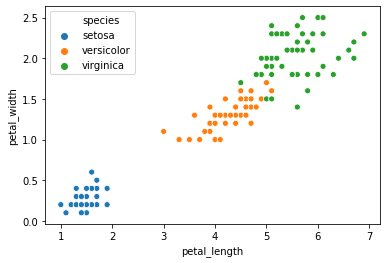

In [6]:
sns.scatterplot(x="petal_length", y="petal_width", data=iris, hue="species")
plt.show()

Still wondering why SVC could be so successful?

No let's run a standard scaler and K-Means afterwards! As we don't have a test set, we can directly fit the scaler and transform our data.

In [23]:
X = iris.drop("species", axis=1)
st_scaler = StandardScaler()
X_scaled = st_scaler.fit_transform(X)

Let's start with 2 clusters. Remember, we do not know that it is supposed to be three!

In [19]:
km = KMeans(n_clusters = 2)

In [24]:
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
iris["n=2"] = km.predict(X_scaled)

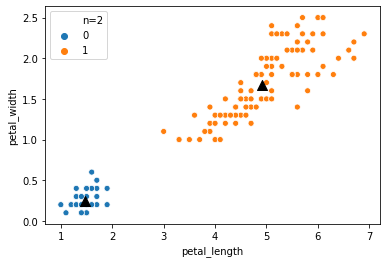

In [49]:
sns.scatterplot(x="petal_length", y="petal_width", data=iris, hue="n=2")
centers = st_scaler.inverse_transform(km.cluster_centers_).T
center_petal = centers[-2:] 
plt.scatter(center_petal[0], center_petal[1], marker='^', s=100, c='k')
plt.show()

Our **inertia** is the sum of squared distances from our cluster centers!

In [29]:
km.inertia_

222.36170496502297

Now, let's use three clusters!

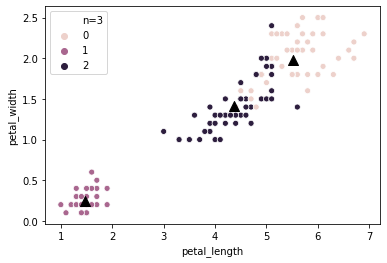

In [53]:
km = KMeans(n_clusters = 3)

km.fit(X_scaled)
iris["n=3"] = km.predict(X_scaled)

sns.scatterplot(x="petal_length", y="petal_width", data=iris, hue="n=3")
centers = st_scaler.inverse_transform(km.cluster_centers_).T
center_petal = centers[-2:] 
plt.scatter(center_petal[0], center_petal[1], marker='^', s=100, c='k')
plt.show()

Clearly, there is some similarity to our original data! Also, our inertia decreases - as we have more clusters, the distance shrinks

In [54]:
km.inertia_

139.82049635974974

In [60]:
inertia = []

for n in range(1,51):
    km = KMeans(n_clusters = n)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

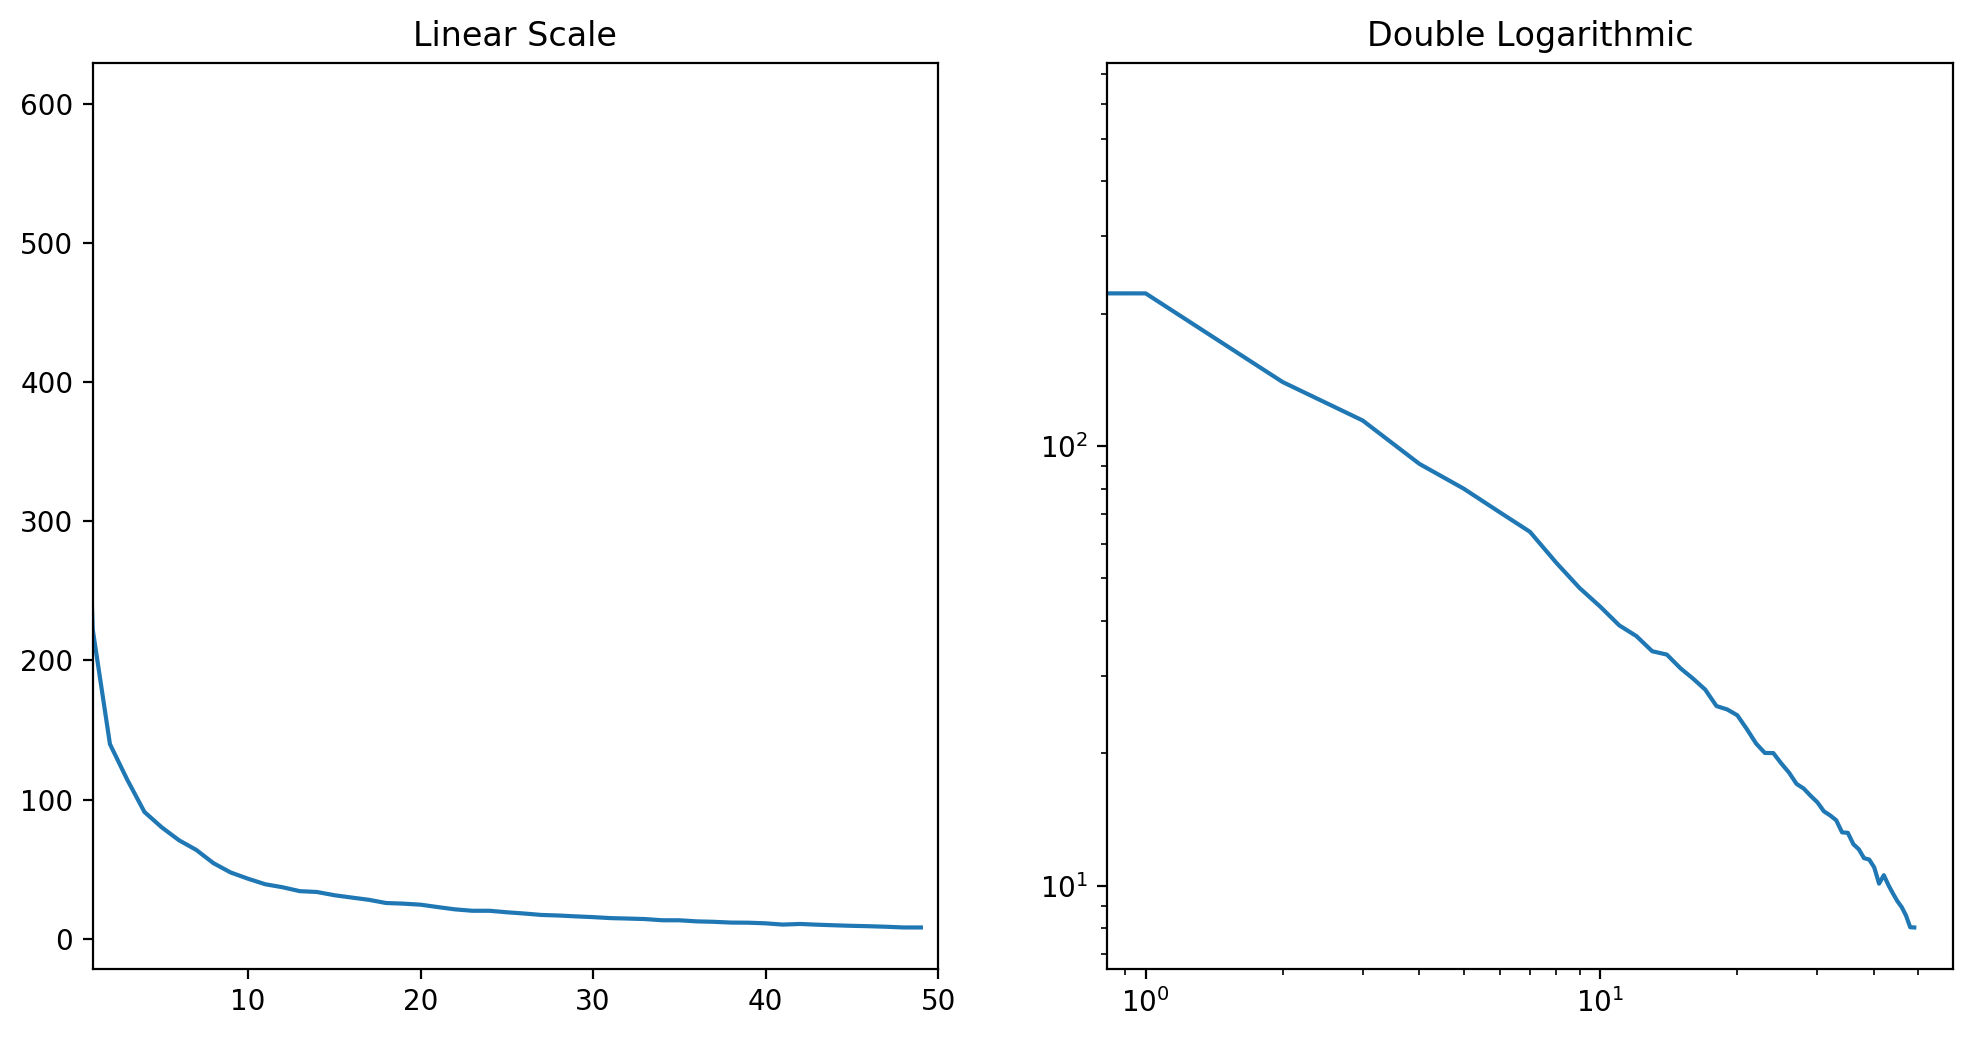

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(12,6), dpi=200)
ax[0].plot(inertia)
ax[1].plot(inertia)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[0].set_xlim([1,50])
ax[0].set_xlim([1,50])
ax[0].set_title("Linear Scale")
ax[1].set_title("Double Logarithmic")
plt.show()

Go and find out how to create a smaller plot within the larger ones to zoom in smaller number of clusters!